<a href="https://colab.research.google.com/github/Dorothy2612/Comsc210-Labs/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sarita Poudyal Bhandari
### Principles of Programming Languages
### Final Data Science project using Retail Data

#### In this project we have worked with the online retail data set, a transactional dataset of UK based registered online retail stores.  The task of the data is classification and clustering, it has 541909 instances.  It is a multivariate, sequential and time-series data and has integer and real data values. It does have any missing values. This dataset has eight attributes which are described below:



*   The task of the data is classification and clustering, it has 541909 instances and eight attributes.
*  It is a multivariate, sequential and time-series data and has integer and real data values. It does have any missing values.

*  The data is taken from UCI Machine Learning Repository.
*  We are using different models to find the trend of the data.







### The attributes are as follows:

#### InvoiceNo : Invoice number of every transaction.
#### StockCode : Code of the merchandise
#### Description : Description of the  merchandise(for eg: Coat Hanger,Napkins)
#### Quantity : Quantity of the each items that were sold.
#### InvoiceDate : The timeframe of the transaction is between 01/12/2010 to 09/12/2011.
#### UnitPrice : Unit Price of the items.
#### CustomerId : Customer identification number.
#### Country : The country of the data collection.

In [8]:
#### The main goal is to find out the pattern of the sale in UK and France and compare the results based on the mean of the two data sets.
#### The sns joint plot and boxplot, pairplot and heatmap to show the france  The variable data_france_new is the unit price that is great or 
#### equal to 30 and we have shown the pattern in  pairplot.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#path ="/content/drive/MyDrive/Principles_of_Programming_Languages/Data/"
#data = pd.read_csv(path+"OnlineRetail.csv")
 
#data




In [12]:
path ="/content/drive/My Drive/Principles_of_programming_languages/"
data = pd.read_csv(path+"Online_Retail.csv")
 
data

 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:

data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
data.isnull().sum() # No missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
data.values

array([['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', ...,
        2.55, 17850.0, 'United Kingdom'],
       ['536365', '71053', 'WHITE METAL LANTERN', ..., 3.39, 17850.0,
        'United Kingdom'],
       ['536365', '84406B', 'CREAM CUPID HEARTS COAT HANGER', ..., 2.75,
        17850.0, 'United Kingdom'],
       ...,
       ['581587', '23254', 'CHILDRENS CUTLERY DOLLY GIRL ', ..., 4.15,
        12680.0, 'France'],
       ['581587', '23255', 'CHILDRENS CUTLERY CIRCUS PARADE', ..., 4.15,
        12680.0, 'France'],
       ['581587', '22138', 'BAKING SET 9 PIECE RETROSPOT ', ..., 4.95,
        12680.0, 'France']], dtype=object)

In [18]:
data.items()

<generator object DataFrame.items at 0x7f9ebb88a4a0>

In [19]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [20]:
data.index

RangeIndex(start=0, stop=541909, step=1)

In [21]:
data['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [22]:
data[['Quantity','Country']]

,Quantity,Country
0,6,United Kingdom
1,6,United Kingdom
2,8,United Kingdom
3,6,United Kingdom
4,6,United Kingdom
...,...,...
541904,12,France
541905,6,France
541906,4,France
541907,4,France


In [23]:
data.iloc[0:9, 0:2] # nine rows(0 to 8) and two colums (0 and 1)

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E
5,536365,22752
6,536365,21730
7,536366,22633
8,536366,22632


In [24]:
data [data['Quantity'] > 20]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,12/9/2011 12:31,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,12/9/2011 12:31,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/2011 12:31,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom


In [25]:
data_uk = data[data['Country'] == 'United Kingdom' ]
data_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [26]:
data_france = data[data['Country'] == 'France' ]
data_france

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [27]:
data_france_new = data_france[data_france['UnitPrice'] <= 30.00]
data_france_new


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


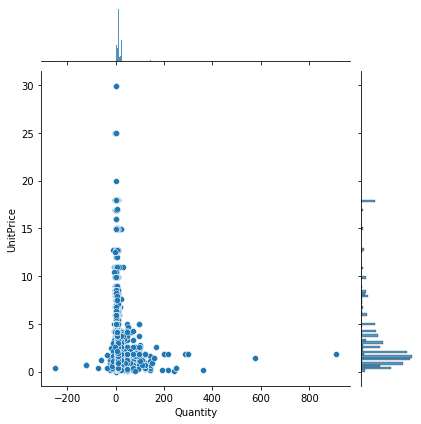

In [28]:
sns.jointplot(data_france_new['Quantity'], data_france_new['UnitPrice'] )

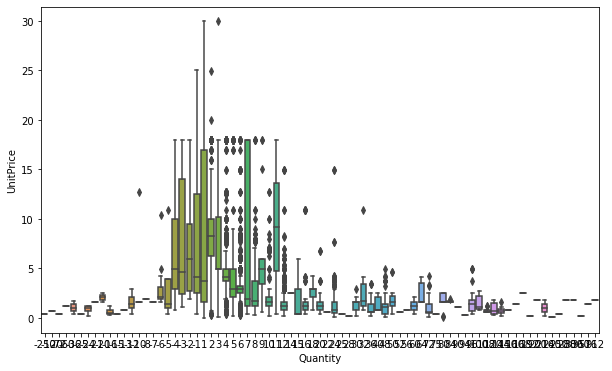

In [29]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = data_france_new["Quantity"], y = data_france_new["UnitPrice"]); 
plt.show()

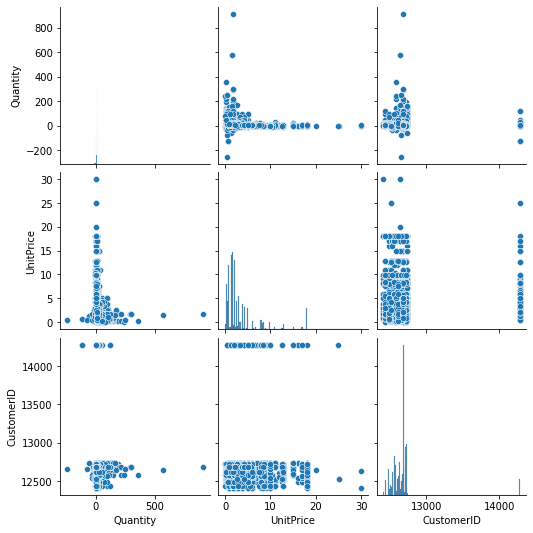

In [30]:
sns.pairplot(data_france_new)

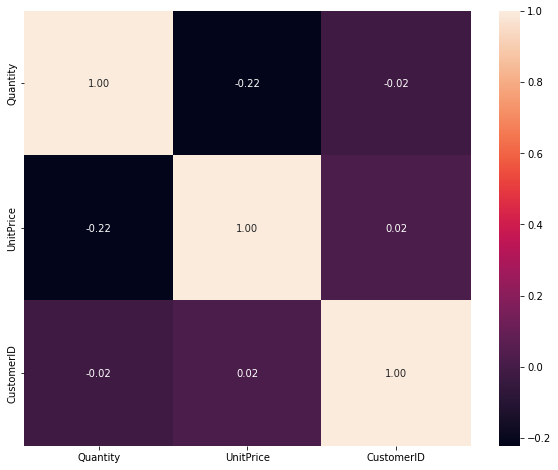

In [31]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data_france_new.corr(), annot = True, fmt = ".2f")  
plt.show()

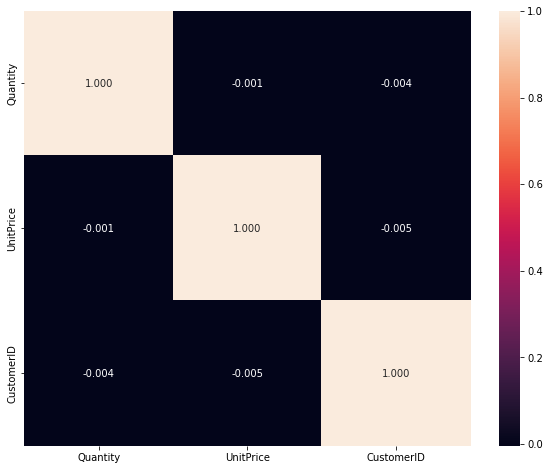

In [32]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, fmt = ".3f") # Relationship of the variables(the relation of quantity to quantity is diagonal)
plt.show()

In [33]:
selected_data = data[['Quantity', 'Description','Country', 'UnitPrice', 'CustomerID']]
selected_data.head(20)

,Quantity,Description,Country,UnitPrice,CustomerID
0,6,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2.55,17850.0
1,6,WHITE METAL LANTERN,United Kingdom,3.39,17850.0
2,8,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2.75,17850.0
3,6,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,3.39,17850.0
4,6,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,3.39,17850.0
5,2,SET 7 BABUSHKA NESTING BOXES,United Kingdom,7.65,17850.0
6,6,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,4.25,17850.0
7,6,HAND WARMER UNION JACK,United Kingdom,1.85,17850.0
8,6,HAND WARMER RED POLKA DOT,United Kingdom,1.85,17850.0
9,32,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,1.69,13047.0


In [34]:
data_2011 = data[data['InvoiceDate'] >= '2011-01-01 12:00:00']
data_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom
105336,545220,48194,DOORMAT HEARTS,2,3/1/2011 8:30,7.95,14620.0,United Kingdom
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/2011 8:30,1.65,14620.0,United Kingdom
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/2011 8:30,4.95,14620.0,United Kingdom
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/2011 8:30,3.75,14620.0,United Kingdom
...,...,...,...,...,...,...,...,...
370926,569202,22486,PLASMATRONIC LAMP,1,9/30/2011 17:22,8.29,NaN,United Kingdom
370927,569202,22495,SET OF 2 ROUND TINS CAMEMBERT,1,9/30/2011 17:22,5.79,NaN,United Kingdom
370928,569202,22539,MINI JIGSAW DOLLY GIRL,2,9/30/2011 17:22,0.83,NaN,United Kingdom
370929,569202,22540,MINI JIGSAW CIRCUS PARADE,2,9/30/2011 17:22,0.83,NaN,United Kingdom


In [35]:
data_france.var()

Quantity        459.031945
UnitPrice      6385.468362
CustomerID    76586.183258
dtype: float64

In [36]:
data_uk.var()

Quantity      5.179664e+04
UnitPrice     9.863556e+03
CustomerID    2.542120e+06
dtype: float64

In [37]:
uk_data = data.groupby(['InvoiceDate']).size()
uk_data

InvoiceDate
1/10/2011 10:04     1
1/10/2011 10:07     1
1/10/2011 10:08     1
1/10/2011 10:32    23
1/10/2011 10:35    17
                   ..
9/9/2011 8:48      16
9/9/2011 9:03      14
9/9/2011 9:13      45
9/9/2011 9:38      14
9/9/2011 9:52      37
Length: 23260, dtype: int64

In [45]:
data_uk_new = data_uk['UnitPrice']

In [39]:
data_france_new = data_france['UnitPrice']

In [40]:
data_france_new.mean()

5.028864087881266

In [41]:
data_uk_new.mean()

4.532422174142948

In [42]:
#import scipy.stats as stats
#stats.ttest_ind(data_uk, data_france, equal.var == True)

In [43]:
df1 = data.replace(to_replace=["France","United Kingdom"],value=[0,1])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,1
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,0


In [70]:
df2=df1.Quantity,df1.Country,df1.UnitPrice
df2

TypeError: ignored

In [69]:
#First regression model 
x=df2
y=df2['UnitPrice']
print(np.corrcoef(x.T, y.T)) #need to take the transpose so that the vectors are the right shape
print(np.corrcoef(y, y, rowvar=False))
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.7)
lr=LinearRegression()
lr_model = lr.fit(x_train, y_train)
coefficients = lr_model.coef_
intercept = lr_model.intercept_

y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(coefficients)
print(intercept)
print(r2)
print(mse) 

TypeError: ignored

### Hypothesis Testing 

#### Null Hypothesis(H0) => µ1 = µ2: The average unit price of United Kingdom and France is different(as the variance is not close)

#### Alternative Hypothesis(H1) => µ1 ≠µ2: The average unit price of United Kingdom and France is same (as the variance is  close)



###  Testing Hypothesis
